# UFO SIGHTINGS DATA ANALYSIS

# ![image](https://github.com/joannathom/UFO-Sightings-/assets/122498031/2809e186-510a-46bd-bbd7-e09c08a8a92a)

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pathlib

# Requirement 1 = Loading two data sources 

In [235]:
import pandas as pd
UFODATA = pd.read_csv('ufo_sightings.csv')
NUFORC = pd.read_csv('nuforc_events.csv')



# Merging both CSV files using panda and pd.concat

In [236]:
import pandas as pd
files = ['ufo_sightings.csv','nuforc_events.csv']
df = pd.DataFrame()
for file in files:
     data = pd.read_csv(file)
     df = pd.concat([df,data],axis=0)
df.to_csv('merged_files.csv',index=False)

# Requirement 2 = Clean and operate on the data while combining them.
  * I am going to look at the datasets by looking at shape, info, describing, 
  and the head. 

In [237]:
df.head()

,Location.City,Location.State,Location.Country,Data.Shape,Data.Encounter duration,Data.Description excerpt,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Dates.Sighted.Year,Dates.Sighted.Month,...,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL
0,anchor point,AK,US,disk,300.0,Large UFO over Mt. ILIAMNA Alaska. ((NUFORC N...,59.776667,-151.831389,2005.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,anchorage,AK,US,changing,21600.0,We could observe red lights dancing across the...,61.218056,-149.900278,2000.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,anchorage,AK,US,changing,600.0,INTENSE AMBER-ORANGE HONEYCOMB SHAPED DUAL HOR...,61.218056,-149.900278,2006.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,anchorage,AK,US,cigar,15.0,I explained away the first time I thought I se...,61.218056,-149.900278,2014.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,anchorage,AK,US,circle,300.0,Orange circles &quot;climbing&quot; then fadin...,61.218056,-149.900278,2011.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
UFODATA.head()

,City,State,Country,Shape,Data.Encounter duration,Data.Description excerpt,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Year,Month,Day,Hour,Minute,Dates.Documented.Year,Dates.Documented.Month,Dates.Documented.Day
0,anchor point,AK,US,disk,300.0,Large UFO over Mt. ILIAMNA Alaska. ((NUFORC N...,59.776667,-151.831389,2005,5,24,18,30,2005,5,28
1,anchorage,AK,US,changing,21600.0,We could observe red lights dancing across the...,61.218056,-149.900278,2000,12,31,21,0,2001,2,18
2,anchorage,AK,US,changing,600.0,INTENSE AMBER-ORANGE HONEYCOMB SHAPED DUAL HOR...,61.218056,-149.900278,2006,10,23,21,3,2006,12,7
3,anchorage,AK,US,cigar,15.0,I explained away the first time I thought I se...,61.218056,-149.900278,2014,3,29,20,45,2014,4,4
4,anchorage,AK,US,circle,300.0,Orange circles &quot;climbing&quot; then fadin...,61.218056,-149.900278,2011,10,21,21,0,2011,10,25


In [239]:
UFODATA.shape

(60632, 16)

In [240]:
UFODATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60632 entries, 0 to 60631
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Location.City                    60632 non-null  object 
 1   Location.State                   60632 non-null  object 
 2   Location.Country                 60632 non-null  object 
 3   Data.Shape                       60632 non-null  object 
 4   Data.Encounter duration          60632 non-null  float64
 5   Data.Description excerpt         60632 non-null  object 
 6   Location.Coordinates.Latitude    60632 non-null  float64
 7   Location.Coordinates.Longitude   60632 non-null  float64
 8   Dates.Sighted.Year               60632 non-null  int64  
 9   Dates.Sighted.Month              60632 non-null  int64  
 10  Date.Sighted.Day                 60632 non-null  int64  
 11  Dates.Sighted.Hour               60632 non-null  int64  
 12  Dates.Sighted.Minu

In [241]:
UFODATA.describe()

,Data.Encounter duration,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Dates.Sighted.Year,Dates.Sighted.Month,Date.Sighted.Day,Dates.Sighted.Hour,Dates.Sighted.Minute,Dates.Documented.Year,Dates.Documented.Month,Dates.Documented.Day
count,6.063200e+04,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000
mean,5.410128e+03,38.311073,-95.584796,2004.447833,6.872658,15.026587,15.809094,17.718367,2007.401537,6.706063,15.229219
std,4.143867e+05,5.552705,18.025296,10.178389,3.249002,8.920703,7.537834,17.924455,4.480640,3.487636,8.789173
min,1.000000e-02,19.426944,-170.478889,1910.000000,1.000000,1.000000,0.000000,0.000000,1998.000000,1.000000,1.000000
25%,3.000000e+01,34.092222,-114.336667,2002.000000,4.000000,7.000000,11.000000,0.000000,2004.000000,4.000000,8.000000
50%,1.800000e+02,38.904306,-89.911111,2007.000000,7.000000,15.000000,19.000000,15.000000,2008.000000,7.000000,14.000000
75%,6.000000e+02,41.924583,-81.035000,2011.000000,10.000000,22.000000,21.000000,30.000000,2012.000000,10.000000,22.000000
max,6.627600e+07,70.636944,-66.984722,2014.000000,12.000000,31.000000,23.000000,59.000000,2014.000000,12.000000,31.000000


* Fixed Column heading on first CSV file

In [242]:

fixed_columns = {
    'Location.City':'City','Location.State':'State', 'Location.Country': 'Country','Data.Shape':'Shape',
    'Location.Coordinates.Latitude':'Latitude',
    'Location.Coordinates.Longitude':'Longitude',
    'Dates.Sighted.Year':'Year',
    'Dates.Sighted.Month':'Month', 'Date.Sighted.Day' : 'Day','Dates.Sighted.Hour': 'Hour',
    'Dates.Sighted.Minute': 'Minute'
}

UFODATA.rename(columns=fixed_columns,inplace=True)
UFODATA.columns
     


Index(['City', 'State', 'Country', 'Shape', 'Data.Encounter duration',
       'Data.Description excerpt', 'Location.Coordinates.Latitude ',
       'Location.Coordinates.Longitude ', 'Year', 'Month', 'Day', 'Hour',
       'Minute', 'Dates.Documented.Year', 'Dates.Documented.Month',
       'Dates.Documented.Day'],
      dtype='object')

In [283]:
UFODATA.head(10)

,City,State,Country,Shape,Data.Encounter duration,Data.Description excerpt,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Year,Month,Day,Hour,Minute,Dates.Documented.Year,Dates.Documented.Month,Dates.Documented.Day
0,anchor point,AK,US,disk,300.0,Large UFO over Mt. ILIAMNA Alaska. ((NUFORC N...,59.776667,-151.831389,2005,5,24,18,30,2005,5,28
1,anchorage,AK,US,changing,21600.0,We could observe red lights dancing across the...,61.218056,-149.900278,2000,12,31,21,0,2001,2,18
2,anchorage,AK,US,changing,600.0,INTENSE AMBER-ORANGE HONEYCOMB SHAPED DUAL HOR...,61.218056,-149.900278,2006,10,23,21,3,2006,12,7
3,anchorage,AK,US,cigar,15.0,I explained away the first time I thought I se...,61.218056,-149.900278,2014,3,29,20,45,2014,4,4
4,anchorage,AK,US,circle,300.0,Orange circles &quot;climbing&quot; then fadin...,61.218056,-149.900278,2011,10,21,21,0,2011,10,25
5,anchorage,AK,US,circle,4.0,Large&#44 bright&#44 blue/white circular objec...,61.218056,-149.900278,1972,8,30,1,30,2004,1,17
6,anchorage,AK,US,circle,7200.0,Multiple craft sighted above a Anchorage&#44 Ak,61.218056,-149.900278,2006,10,23,21,0,2006,10,30
7,anchorage,AK,US,circle,900.0,Approx. 12 orange orbs moving across the sky f...,61.218056,-149.900278,2013,10,23,20,0,2013,11,11
8,anchorage,AK,US,circle,10.0,It was gray and did not move or have any light...,61.218056,-149.900278,1998,10,31,10,0,2004,3,2
9,anchorage,AK,US,circle,10.0,At least 40 round red orbs hovering in formati...,61.218056,-149.900278,2013,12,23,22,22,2014,1,10


In [244]:
UFODATA.State.unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [245]:
UFODATA[UFODATA.State.str.contains('null')].head()

,City,State,Country,Shape,Data.Encounter duration,Data.Description excerpt,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Year,Month,Day,Hour,Minute,Dates.Documented.Year,Dates.Documented.Month,Dates.Documented.Day


In [280]:
UFODATA.dropna()

,City,State,Country,Shape,Data.Encounter duration,Data.Description excerpt,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Year,Month,Day,Hour,Minute,Dates.Documented.Year,Dates.Documented.Month,Dates.Documented.Day
0,anchor point,AK,US,disk,300.0,Large UFO over Mt. ILIAMNA Alaska. ((NUFORC N...,59.776667,-151.831389,2005,5,24,18,30,2005,5,28
1,anchorage,AK,US,changing,21600.0,We could observe red lights dancing across the...,61.218056,-149.900278,2000,12,31,21,0,2001,2,18
2,anchorage,AK,US,changing,600.0,INTENSE AMBER-ORANGE HONEYCOMB SHAPED DUAL HOR...,61.218056,-149.900278,2006,10,23,21,3,2006,12,7
3,anchorage,AK,US,cigar,15.0,I explained away the first time I thought I se...,61.218056,-149.900278,2014,3,29,20,45,2014,4,4
4,anchorage,AK,US,circle,300.0,Orange circles &quot;climbing&quot; then fadin...,61.218056,-149.900278,2011,10,21,21,0,2011,10,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60627,sheridan,WY,US,oval,20.0,blue-green bright oval was spotted 20 miles so...,44.797222,-106.955556,2002,9,6,21,0,2002,9,13
60628,thermopolis,WY,US,unknown,15.0,UFO near Thermopolis WY,43.646111,-108.211389,2007,6,14,23,0,2007,8,7
60629,torrington,WY,US,cigar,2.0,I was on a hill enjoying the sunset. I fell as...,42.065000,-104.181111,2011,11,5,21,30,2011,12,12
60630,worland,WY,US,light,15.0,The object was a dim point of light that grew ...,44.016944,-107.954722,2003,6,17,22,42,2003,6,18


In [247]:
NUFORC.head()

,Event_Time,Event_Date,Year,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL
0,2017-04-20T14:15:00Z,2017-04-20,2017.0,4.0,20.0,14.0,15.0,Palmyra,NJ,Other,5 minutes,I observed an aircraft that seemed to look odd.,http://www.nuforc.org/webreports/133/S133726.html
1,2017-04-20T04:56:00Z,2017-04-20,2017.0,4.0,20.0,4.0,56.0,Bridgeview,IL,Light,20 seconds,"Bridgeview, IL, blue light. ((anonymous report))",http://www.nuforc.org/webreports/133/S133720.html
2,2017-04-19T23:55:00Z,2017-04-19,2017.0,4.0,19.0,23.0,55.0,Newton,AL,Triangle,5 seconds,Silent triangle UFO.,http://www.nuforc.org/webreports/133/S133724.html
3,2017-04-19T23:50:00Z,2017-04-19,2017.0,4.0,19.0,23.0,50.0,Newton,AL,Triangle,5-6 minutes,My friend and I stepped outside hoping to catc...,http://www.nuforc.org/webreports/133/S133723.html
4,2017-04-19T23:29:00Z,2017-04-19,2017.0,4.0,19.0,23.0,29.0,Denver,CO,Light,1 hour,Moved slow but made quick turns staying and ci...,http://www.nuforc.org/webreports/133/S133721.html


In [248]:
NUFORC.shape

(110265, 13)

# Cleaning columns heads looked alright to use

In [249]:
NUFORC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110265 entries, 0 to 110264
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Event_Time  108575 non-null  object 
 1   Event_Date  110012 non-null  object 
 2   Year        110012 non-null  float64
 3   Month       110012 non-null  float64
 4   Day         110163 non-null  float64
 5   Hour        108685 non-null  float64
 6   Minute      108677 non-null  float64
 7   City        110033 non-null  object 
 8   State       101961 non-null  object 
 9   Shape       106790 non-null  object 
 10  Duration    106103 non-null  object 
 11  Summary     110229 non-null  object 
 12  Event_URL   110265 non-null  object 
dtypes: float64(5), object(8)
memory usage: 10.9+ MB


In [250]:
NUFORC.describe()

,Year,Month,Day,Hour,Minute
count,110012.000000,110012.000000,110163.000000,108685.000000,108677.000000
mean,2005.569502,6.855970,15.255349,15.741998,17.671945
std,11.564502,3.231774,21.532426,14.150724,17.933840
min,1061.000000,1.000000,0.000000,0.000000,0.000000
25%,2002.000000,4.000000,7.000000,11.000000,0.000000
50%,2008.000000,7.000000,15.000000,19.000000,15.000000
75%,2013.000000,9.000000,22.000000,21.000000,30.000000
max,2017.000000,12.000000,2001.000000,2000.000000,99.000000


In [251]:
NUFORC.dropna()

,Event_Time,Event_Date,Year,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL
0,2017-04-20T14:15:00Z,2017-04-20,2017.0,4.0,20.0,14.0,15.0,Palmyra,NJ,Other,5 minutes,I observed an aircraft that seemed to look odd.,http://www.nuforc.org/webreports/133/S133726.html
1,2017-04-20T04:56:00Z,2017-04-20,2017.0,4.0,20.0,4.0,56.0,Bridgeview,IL,Light,20 seconds,"Bridgeview, IL, blue light. ((anonymous report))",http://www.nuforc.org/webreports/133/S133720.html
2,2017-04-19T23:55:00Z,2017-04-19,2017.0,4.0,19.0,23.0,55.0,Newton,AL,Triangle,5 seconds,Silent triangle UFO.,http://www.nuforc.org/webreports/133/S133724.html
3,2017-04-19T23:50:00Z,2017-04-19,2017.0,4.0,19.0,23.0,50.0,Newton,AL,Triangle,5-6 minutes,My friend and I stepped outside hoping to catc...,http://www.nuforc.org/webreports/133/S133723.html
4,2017-04-19T23:29:00Z,2017-04-19,2017.0,4.0,19.0,23.0,29.0,Denver,CO,Light,1 hour,Moved slow but made quick turns staying and ci...,http://www.nuforc.org/webreports/133/S133721.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110001,1861-03-29T00:00:00Z,1861-03-29,1861.0,3.0,29.0,0.0,0.0,New York City (Manhattan),NY,Cross,unknown,"Strange, cross-shaped, object witnessed over N...",http://www.nuforc.org/webreports/095/S95986.html
110002,1860-08-02T23:00:00Z,1860-08-02,1860.0,8.0,2.0,23.0,0.0,Cherokee,NC,Fireball,less than a minute?,meteor or fireball passage,http://www.nuforc.org/webreports/008/S08388.html
110004,1800-04-05T20:00:00Z,1800-04-05,1800.0,4.0,5.0,20.0,0.0,Baton Rouge,LA,Light,15 seconds,UFO report communicated by Thomas Jefferson,http://www.nuforc.org/webreports/079/S79941.html
110005,1790-06-30T21:00:00Z,1790-06-30,1790.0,6.0,30.0,21.0,0.0,Carlisle,NY,Fireball,less than 1 minute,"Slow Moving Fireball, stench of burning sulpher",http://www.nuforc.org/webreports/057/S57309.html


In [278]:
Merged = pd.read_csv('merged_files.csv')

C:\Users\18595\AppData\Local\Temp\ipykernel_4968\615820822.py:1: DtypeWarning: Columns (0,1,2,3,5,16,17,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  Merged = pd.read_csv('merged_files.csv')


In [279]:
Merged.head()

,Location.City,Location.State,Location.Country,Data.Shape,Data.Encounter duration,Data.Description excerpt,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Dates.Sighted.Year,Dates.Sighted.Month,...,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL
0,anchor point,AK,US,disk,300.0,Large UFO over Mt. ILIAMNA Alaska. ((NUFORC N...,59.776667,-151.831389,2005.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,anchorage,AK,US,changing,21600.0,We could observe red lights dancing across the...,61.218056,-149.900278,2000.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,anchorage,AK,US,changing,600.0,INTENSE AMBER-ORANGE HONEYCOMB SHAPED DUAL HOR...,61.218056,-149.900278,2006.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,anchorage,AK,US,cigar,15.0,I explained away the first time I thought I se...,61.218056,-149.900278,2014.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,anchorage,AK,US,circle,300.0,Orange circles &quot;climbing&quot; then fadin...,61.218056,-149.900278,2011.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
Merged.shape

(3, 3)

In [272]:
Merged.columns

Index(['city', 'latitude', 'longitude'], dtype='object')

In [269]:
Merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       3 non-null      object 
 1   latitude   3 non-null      float64
 2   longitude  3 non-null      float64
dtypes: float64(2), object(1)
memory usage: 200.0+ bytes


In [255]:
Merged.describe()

,latitude,longitude
count,3.000000,3.000000
mean,49.837500,9.111852
std,2.349610,5.925778
min,48.137222,2.351667
25%,48.496944,6.963611
50%,48.856667,11.575556
75%,50.687639,12.491944
max,52.518611,13.408333


# Requirement 3 = Creating Visualizations
  * Make 3 matplotlib or seaborn (or another plotting library) visualizations to display your data.

In [256]:
import seaborn as sns
import matplotlib 

In [257]:
sns.set_style('dark')

## What UFO Shapes were most seen during each month?

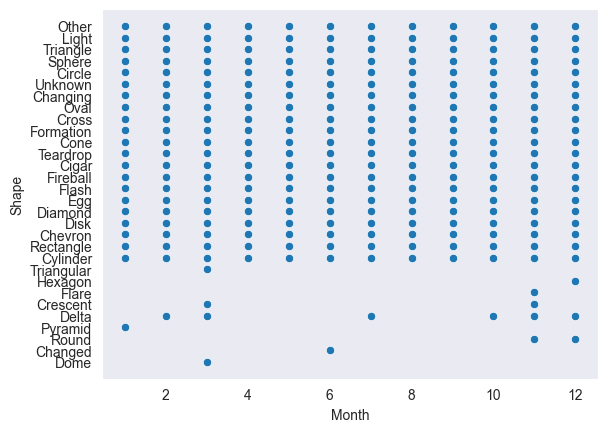

In [284]:
sns.scatterplot (x ='Month', y='Shape', data=Merged);